<br><br><br><br><br>

# Columnar data analysis

<br><br><br><br><br>

<br><br><br><br>

<p style="font-size: 1.25em">Array programming is a programming language paradigm like Object-Oriented Programming (OOP) and Functional Programming (FP).</p>

<br>

<p style="font-size: 1.25em">As physicists, we are mostly familiar with <i>imperative, procedural, structured, object-oriented programming</i> (see <a href="https://en.wikipedia.org/wiki/Comparison_of_programming_paradigms#Main_paradigm_approaches">this list</a>).</p>

<br><br><br><br>

In [1]:
from IPython.display import IFrame    
IFrame("http://zoom.it/6rJp", width="100%", height="440")

<br>

<p style="font-size: 1.25em">Array programming is common to languages and systems designed for interactive data analysis.</p>

<img src="img/apl-timeline.png" width="100%">

<br>

<br><br>

<table align="left" width="33%" style="margin-right: 50px">
<tr style="background: white"><td><img src="img/apl-keyboard.jpg" width="100%"></td></tr>
<tr style="background: white"><td style="text-align: center"><i>Special keyboard for all the symbols.</i></td></tr>
<tr style="background: white"><td align="center"><img src="img/tshirt.jpg" width="50%"></td></tr>
<tr style="background: white"><td style="text-align: center"><i>A program was a struggle to write, but T-shirt fodder when it worked.</i></td></tr>
</table>

<br>

<p style="font-size: 1.25em">APL (1963) pioneered programming language conciseness—and discovered the mistake of being too concise.</p>

| APL | <br> | Numpy |
|:---:|:----:|:-----:|
| <tt>ι4</tt> | <br> | <tt>numpy.arange(4)</tt> |
| <tt>(3+ι4)</tt> | <br> | <tt>numpy.arange(4) + 3</tt> |
| <tt>+/(3+ι4)</tt> | <br> | <tt>(numpy.arange(4) + 3).sum()</tt> |
| <tt>m ← +/(3+ι4)</tt> | <br> | <tt>m = (numpy.arange(4) + 3).sum()</tt> |

(The other extreme is writing for loops for each of the above.)

<br><br>

<br><br><br><br>

<p style="font-size: 1.25em">The fundamental data type in this world is an array. (Some array languages don't even have non-arrays.)</p>

<br>

<p style="font-size: 1.25em">Unlike the others (APL, IDL, MATLAB, R), Numpy is a library, not a language, though it goes all the way back to the beginning of Python (1995) and significantly influenced Python's grammar.</p>

<br><br><br><br>

In [2]:
# Assortment of ways to make Numpy arrays

import numpy, uproot
print(numpy.arange(20),                                        end="\n\n")
print(numpy.linspace(-5, 5, 21),                               end="\n\n")
print(numpy.empty(10000, numpy.float16),                       end="\n\n")
print(numpy.full((2, 7), 999),                                 end="\n\n")
print(numpy.random.normal(-1, 0.0001, 10000),                  end="\n\n")
print(uproot.open("data/Zmumu.root")["events"]["E1"].array(),  end="\n\n")

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]

[-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
  2.   2.5  3.   3.5  4.   4.5  5. ]

[ 7.812e-03  0.000e+00  0.000e+00 ... -5.323e-05  5.978e+04  0.000e+00]

[[999 999 999 999 999 999 999]
 [999 999 999 999 999 999 999]]

[-0.99988257 -1.00000867 -1.00004315 ... -0.99979673 -1.00007011
 -1.0001712 ]

[82.20186639 62.34492895 62.34492895 ... 81.27013558 81.27013558
 81.56621735]



<br><br>

<center><img src="img/numpy-memory-layout.png" width="90%"></center>

<br><br>

In [3]:
a = numpy.array([2**30, 2**30 + 2**26, -1, 0, 2**30 + 2**24, 2**30 + 2**20], numpy.int32)
# a = a.view(numpy.float32)
# a = a.reshape((2, 3))
# a = a.astype(numpy.int64)

print("data:\n", a, end="\n\n")
print("type:", type(a), end="\n\n")
print("dtype (type of the data it contains):", a.dtype, end="\n\n")
print("shape: (size of each dimension):", a.shape, end="\n\n")

data:
 [1073741824 1140850688         -1          0 1090519040 1074790400]

type: <class 'numpy.ndarray'>

dtype (type of the data it contains): int32

shape: (size of each dimension): (6,)



In [4]:
# Any mathematical function that would map scalar arguments to a scalar result
#                                      maps array arguments to an array result.

a_array = numpy.random.uniform(5, 10, 10000);     a_scalar = a_array[0]
b_array = numpy.random.uniform(10, 20, 10000);    b_scalar = b_array[0]
c_array = numpy.random.uniform(-0.1, 0.1, 10000); c_scalar = c_array[0]

def quadratic_formula(a, b, c):
    return (-b + numpy.sqrt(b**2 - 4*a*c)) / (2*a)

print("scalar:\n", quadratic_formula(a_scalar, b_scalar, c_scalar), end="\n\n")
print("array:\n",  quadratic_formula(a_array,  b_array,  c_array), end="\n\n")

scalar:
 0.0006013822673149542

array:
 [ 0.00060138  0.00451882  0.00247519 ...  0.00496957  0.00975395
 -0.00526707]



In [5]:
# Each step in the calculation is performed over whole arrays before moving on to the next.

a, b, c = a_array, b_array, c_array

roots1 = (-b + numpy.sqrt(b**2 - 4*a*c)) / (2*a)

tmp1 = numpy.negative(b)            # -b
tmp2 = numpy.square(b)              # b**2
tmp3 = numpy.multiply(4, a)         # 4*a
tmp4 = numpy.multiply(tmp3, c)      # tmp3*c
tmp5 = numpy.subtract(tmp2, tmp4)   # tmp2 - tmp4
tmp6 = numpy.sqrt(tmp5)             # sqrt(tmp5)
tmp7 = numpy.add(tmp1, tmp6)        # tmp1 + tmp6
tmp8 = numpy.multiply(2, a)         # 2*a
roots2 = numpy.divide(tmp7, tmp8)   # tmp7 / tmp8

roots1, roots2

(array([ 0.00060138,  0.00451882,  0.00247519, ...,  0.00496957,
         0.00975395, -0.00526707]),
 array([ 0.00060138,  0.00451882,  0.00247519, ...,  0.00496957,
         0.00975395, -0.00526707]))

In [6]:
# Even comparison operators are element-by-element.

roots1 == roots2

array([ True,  True,  True, ...,  True,  True,  True])

In [7]:
# So use a reducer (e.g. sum, max, min, any, all) to turn the array into a scalar.

(roots1 == roots2).all()

True

In [8]:
px, py, pz = uproot.open("data/Zmumu.root")["events"].arrays("p[xyz]1", outputtype=tuple)

p = numpy.sqrt(px**2 + py**2 + pz**2)
p

array([82.20179848, 62.34483942, 62.34483942, ..., 81.27006689,
       81.27006689, 81.56614892])

In [9]:
# But what if there are multiple values per event?

uproot.open("data/HZZ.root")["events"].array("Muon_Px")

<JaggedArray [[-52.899456 37.73778] [-0.81645936] [48.98783 0.8275667] ... [-29.756786] [1.1418698] [23.913206]] at 0x7b4ca0137748>

In [11]:
# JaggedArray can be used in place of a Numpy array in some contexts,
# such as array-at-a-time math. Functions like numpy.sqrt recognize it.

px, py, pz = uproot.open("data/HZZ.root")["events"].arrays(["Muon_P[xyz]"], outputtype=tuple)

numpy.sqrt(px**2 + py**2 + pz**2)

<JaggedArray [[54.7794 39.401554] [31.69027] [54.739685 47.48874] ... [62.395073] [174.2086] [69.55613]] at 0x7b4c8c08be80>

<br><br>

<center><img src="img/numpy-memory-broadcasting.png" width="75%"></center>

<br><br>

In [12]:
E, px, py, pz = uproot.open("data/Zmumu.root")["events"].arrays(["E1", "p[xyz]1"], outputtype=tuple)

# Numpy arrays
#                   array   array   array   scalar
energy = numpy.sqrt(px**2 + py**2 + pz**2 + 0.1056583745**2)
energy, E

(array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
        81.27013558, 81.56621735]),
 array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
        81.27013558, 81.56621735]))

In [13]:
E, px, py, pz = uproot.open("data/HZZ.root")["events"].arrays(["Muon_E", "Muon_P[xyz]"], outputtype=tuple)

# JaggedArrays
#                   array   array   array   scalar
energy = numpy.sqrt(px**2 + py**2 + pz**2 + 0.1056583745**2)
energy, E

(<JaggedArray [[54.7795 39.401695] [31.690447] [54.739788 47.488857] ... [62.39516] [174.20863] [69.55621]] at 0x7b4ca0127be0>,
 <JaggedArray [[54.7795 39.401695] [31.690445] [54.739788 47.488857] ... [62.39516] [174.20863] [69.55621]] at 0x7b4c837fe278>)

In [16]:
import awkward  # the library that defines JaggedArrays and other "awkward" arrays

scalar = 1000
flat   = numpy.array([100, 200, 300])
jagged = awkward.fromiter([[1.1, 2.2, 3.3], [], [4.4, 5.5]])

# With JaggedArrays, there are more broadcasting cases:
print(f"scalar + flat:   {scalar + flat}")
print(f"\nscalar + jagged: {scalar + jagged}")
print(f"\n  flat + jagged: {flat + jagged}")

scalar + flat:   [1100 1200 1300]

scalar + jagged: [[1001.1 1002.2 1003.3] [] [1004.4 1005.5]]

  flat + jagged: [[101.1 102.2 103.3] [] [304.4 305.5]]


In [17]:
# Using jagged broadcasting in physics

jetx, jety, metx, mety = uproot.open("data/HZZ.root")["events"].arrays(
    ["Jet_P[xy]", "MET_p[xy]"], outputtype=tuple)

jet_phi = numpy.arctan2(jety, jetx)
met_phi = numpy.arctan2(mety, metx)

print(f"multi per event: {jet_phi}")
print(f"one per event:   {met_phi}")

print(f"\ndifference:      {jet_phi - met_phi}")

multi per event: [[] [2.669215] [] ... [-1.6703207] [2.8687775 -2.0823672] []]
one per event:   [ 0.40911174 -0.58348763  2.5796134  ...  1.2252938  -0.58017296
 -0.18039851]

difference:      [[] [3.2527027] [] ... [-2.8956146] [3.4489505 -1.5021942] []]


In [20]:
# Q: What about ensuring that each delta-phi is between -pi and pi without if/then?
# A: You start to pick up tricks, like this:

raw_diff = jet_phi - met_phi

bounded_diff = (raw_diff + numpy.pi) % (2*numpy.pi) - numpy.pi

# Should dphi be a library function? That's the kind of question we think about...

raw_diff, bounded_diff
# bounded_diff.flatten().min(), bounded_diff.flatten().max()

(<JaggedArray [[] [3.2527027] [] ... [-2.8956146] [3.4489505 -1.5021942] []] at 0x7b4ca0128b38>,
 <JaggedArray [[] [-3.0304825] [] ... [-2.8956146] [-2.834235 -1.5021942] []] at 0x7b4c8c1ae630>)

<br><br><br><br><br>

<p style="font-size: 1.25em; text-align: center"><b>Reducers:</b> any, all, count, count_nonzero, sum, prod, min, max</p>

<br><br><br><br><br>

In [21]:
# Another way JaggedArrays extend Numpy arrays:

# Reducers, like sum, min, max, turn flat arrays into scalars.

met_phi.min(), met_phi.max()

(-3.141034, 3.1297169)

In [22]:
# Another way JaggedArrays extend Numpy arrays:

# Reducers, like sum, min, max, turn jagged arrays into flat arrays.

jet_phi.min(), jet_phi.max()

(array([       inf,  2.669215 ,        inf, ..., -1.6703207, -2.0823672,
               inf], dtype=float32),
 array([      -inf,  2.669215 ,       -inf, ..., -1.6703207,  2.8687775,
              -inf], dtype=float32))

In [24]:
# The meaning of flat.sum() is "sum of all elements of the flat array."
# The meaning of jagged.sum() is "sum of all elements in each inner array."

jagged = awkward.fromiter([[1.0, 2.0, 3.0], [], [4.0, 5.0]])
jagged.sum()   # min, max

array([6., 0., 9.])

In [25]:
# jagged.sum().sum() completes the process, resulting in a scalar. But,
# jagged.flatten().sum() does the same thing. Why?

jagged.sum().sum(), jagged.flatten().sum()

(15.0, 15.0)

In [26]:
# mean, var, std are also available, just like Numpy, but these aren't associative.

# "Don't do a mean of means unless you mean it!"

jet_phi.mean()

array([        nan,  2.66921496,         nan, ..., -1.67032075,
        0.39320517,         nan])

In [27]:
# Also worth noting that any and all are reducers... of booleans.

same_hemicircle = (abs(bounded_diff) < numpy.pi/2)

print(f"same_hemicircle:             {same_hemicircle}")
print(f"same_hemicircle.any():       {same_hemicircle.any()}")
print(f"same_hemicircle.any().any(): {same_hemicircle.any().any()}")
print(f"same_hemicircle.any().all(): {same_hemicircle.any().all()}")
print(f"same_hemicircle.all():       {same_hemicircle.all()}")
print(f"same_hemicircle.all().any(): {same_hemicircle.all().any()}")
print(f"same_hemicircle.all().all(): {same_hemicircle.all().all()}")

same_hemicircle:             [[] [False] [] ... [False] [False True] []]
same_hemicircle.any():       [False False False ... False  True False]
same_hemicircle.any().any(): True
same_hemicircle.any().all(): False
same_hemicircle.all():       [ True False  True ... False False  True]
same_hemicircle.all().any(): True
same_hemicircle.all().all(): False


<br><br><br><br><br>

<p style="font-size: 1.25em; text-align: center"><b>Slicing:</b> single-item extraction, filtering (cuts), rearrangement</p>

<br><br><br><br><br>

In [28]:
# Basic array slicing is the same as Python list slicing

a = numpy.array([0.0, 1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9])

for expr in ["a[3]      ", "a[3:]     ", "a[:3]     ",
             "a[3:7]    ", "a[3:7:2]  ", "a[::2]    "]:
    print(expr, "=", eval(expr))

print()
for expr in ["a[-3]     ", "a[-3:]    ", "a[:-3]    ",
             "a[-7:-3]  ", "a[-7:-3:2]", "a[::-1]   "]:
    print(expr, "=", eval(expr))

a[3]       = 3.3
a[3:]      = [3.3 4.4 5.5 6.6 7.7 8.8 9.9]
a[:3]      = [0.  1.1 2.2]
a[3:7]     = [3.3 4.4 5.5 6.6]
a[3:7:2]   = [3.3 5.5]
a[::2]     = [0.  2.2 4.4 6.6 8.8]

a[-3]      = 7.7
a[-3:]     = [7.7 8.8 9.9]
a[:-3]     = [0.  1.1 2.2 3.3 4.4 5.5 6.6]
a[-7:-3]   = [3.3 4.4 5.5 6.6]
a[-7:-3:2] = [3.3 5.5]
a[::-1]    = [9.9 8.8 7.7 6.6 5.5 4.4 3.3 2.2 1.1 0. ]


In [29]:
# But multidimensional arrays can be sliced with an extension of list slicing.
a = numpy.array([[ 0,  1,  2,  3,  4,  5],
                 [10, 11, 12, 13, 14, 15],
                 [20, 21, 22, 23, 24, 25],
                 [30, 31, 32, 33, 34, 35]])
for expr in "a[2:, 1:]", "a[:, 1:-1]", "a[::2, ::2]", "a[:, 3]":
    print(expr, " =\n", eval(expr), sep="", end="\n\n")

a[2:, 1:] =
[[21 22 23 24 25]
 [31 32 33 34 35]]

a[:, 1:-1] =
[[ 1  2  3  4]
 [11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]]

a[::2, ::2] =
[[ 0  2  4]
 [20 22 24]]

a[:, 3] =
[ 3 13 23 33]



<center><img src="img/numpy-slicing.png" width="40%"></center>

In [31]:
# Masking: using an array of booleans as a slice

a    = numpy.array([  1.1,   2.2,   3.3,   4.4,  5.5,   6.6,  7.7,   8.8,  9.9])
mask = numpy.array([False, False, False, False, True, False, True, False, True])
#                                                5.5          7.7          9.9

for expr in "a[mask]", "a < 5", "a[a < 5]":
    print(expr, " =\n", eval(expr), sep="", end="\n\n")

a[mask] =
[5.5 7.7 9.9]

a < 5 =
[ True  True  True  True False False False False False]

a[a < 5] =
[1.1 2.2 3.3 4.4]



dict_keys(['Type', 'Run', 'Event', 'E1', 'px1', 'py1', 'pz1', 'pt1', 'eta1', 'phi1', 'Q1', 'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2', 'Q2', 'M'])


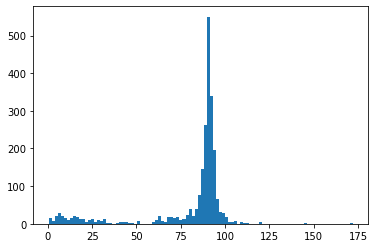

In [33]:
# Five-minute exercise: plot masses with (1) opposite charges and
#                                        (2) both muon abs(eta) < 1
arrays = uproot.open("data/Zmumu.root")["events"].arrays(namedecode="utf-8")
print(arrays.keys())
for n in arrays:
    exec(f"{n} = arrays['{n}']")

import matplotlib.pyplot
matplotlib.pyplot.hist(M, bins=100);

In [35]:
# What if the boolean mask is jagged?

E, px, py, pz, q = uproot.open("data/HZZ.root")["events"].arrays(
    ["Muon_E", "Muon_P[xyz]", "Muon_Charge"], outputtype=tuple)

print(f"q:        {q}")
print(f"\nq > 0:    {q > 0}")
print(f"\nE:        {E}")
print(f"\nE[q > 0]: {E[q > 0]}")

q:        [[1 -1] [1] [1 -1] ... [-1] [-1] [-1]]

q > 0:    [[True False] [True] [True False] ... [False] [False] [False]]

E:        [[54.7795 39.401695] [31.690445] [54.739788 47.488857] ... [62.39516] [174.20863] [69.55621]]

E[q > 0]: [[54.7795] [31.690445] [54.739788] ... [] [] []]


In [36]:
# JaggedArray slicing does what Numpy does in the cases that overlap...

x = awkward.fromiter([[1.1, 2.2, 3.3, 4.4], [5.5, 6.6], [7.7, 8.8, 9.9]])
print(f"x                      = {x}")

# take the first two inner arrays
print(f"\nx[:2]                  = {x[:2]}")

# take the first two of each inner arrays
print(f"\nx[:, :2]               = {x[:, :2]}")

# mask outer lists
print(f"\nx[[True, False, True]] = {x[[True, False, True]]}")

x                      = [[1.1 2.2 3.3 4.4] [5.5 6.6] [7.7 8.8 9.9]]

x[:2]                  = [[1.1 2.2 3.3 4.4] [5.5 6.6]]

x[:, :2]               = [[1.1 2.2] [5.5 6.6] [7.7 8.8]]

x[[True, False, True]] = [[1.1 2.2 3.3 4.4] [7.7 8.8 9.9]]


In [40]:
# ... and naturally extend it in the new cases.

x      = awkward.fromiter([[ 1.1,   2.2,  3.3], [  4.4,   5.5], [ 6.6,  7.7,  8.8]])
mask   = awkward.fromiter([        True,             False,             True      ])
jmask  = awkward.fromiter([[True, False, True], [False, False], [True, True, True]])

print(f"x[mask]  = {x[mask]}")       # mask outer array
print(f"\nx[jmask] = {x[jmask]}")    # mask inner arrays

x[mask]  = [[1.1 2.2 3.3] [6.6 7.7 8.8]]

x[jmask] = [[1.1 3.3] [] [6.6 7.7 8.8]]


In [41]:
# In Numpy, arrays of integers can also be used as indexes.

a = numpy.array([0.0, 1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9])

print("selects elements, possibly out of order")
index = numpy.array([3, 5, 0, 9])
print("a[[3, 5, 0, 9]] =", a[index])

print("\nmay use negative indexing, just like single integers and slices")
index = numpy.array([3, 5, 0, -1, -2, -3])
print("a[[3, 5, 0, -1, -2, -3]] =", a[index])

print("\nmay include repetitions(!)")
index = numpy.array([3, 5, 0, 9, 9, 9, 3, 5, 0])
print("a[[3, 5, 0, 9, 9, 9, 3, 5, 0]] =", a[index])

selects elements, possibly out of order
a[[3, 5, 0, 9]] = [3.3 5.5 0.  9.9]

may use negative indexing, just like single integers and slices
a[[3, 5, 0, -1, -2, -3]] = [3.3 5.5 0.  9.9 8.8 7.7]

may include repetitions(!)
a[[3, 5, 0, 9, 9, 9, 3, 5, 0]] = [3.3 5.5 0.  9.9 9.9 9.9 3.3 5.5 0. ]


In [42]:
# What is integer indexing good for?

permutation = eta1.argsort()                   # also try abs(eta1).argsort()

print(f"permutation:\n{permutation}")

print(f"\n\nsorted eta1:\n{eta1[permutation]}")

print(f"\n\nE1 sorted by eta1:\n{E1[permutation]}")

permutation:
[ 63  64  65 ... 136 135 133]


sorted eta1:
[-2.41404 -2.41404 -2.41404 ...  2.42365  2.42365  2.42365]


E1 sorted by eta1:
[ 6.03288979  6.03288979  6.03288979 ... 11.8752667  11.8752667
 11.8752667 ]


In [44]:
# Integer indexes with JaggedArrays:

x      = awkward.fromiter([[ 1.1, 2.2, 3.3, 4.4], [5.5, 6.6], [7.7, 8.8, 9.9]])
index  = awkward.fromiter([-1, 0, 0])
jindex = awkward.fromiter([[0, 0, -1], [0, 0, -1], [0, 0, -1]])

print(f"x[index]  = {x[index]}")       # raarrange outer array
print(f"\nx[jindex] = {x[jindex]}")    # raarrange inner arrays

x[index]  = [[7.7 8.8 9.9] [1.1 2.2 3.3 4.4] [1.1 2.2 3.3 4.4]]

x[jindex] = [[1.1 1.1 4.4] [5.5 5.5 6.6] [7.7 7.7 9.9]]


In [45]:
# Use case for jagged indexing: argmin and argmax

E, px, py, pz, q = uproot.open("data/HZZ.root")["events"].arrays(
    ["Muon_E", "Muon_P[xyz]", "Muon_Charge"], outputtype=tuple)

eta = numpy.arctanh(pz / numpy.sqrt(px**2 + py**2 + pz**2))
print(f"eta:            {eta}")

maxabseta = abs(eta).argmax()
print(f"\nmaxabseta:      {maxabseta}")

print(f"\neta[maxabseta]: {eta[maxabseta]}")   # eta with max |eta| per event

print(f"\nE[maxabseta]:   {E[maxabseta]}")     # energy with max |eta| per event

eta:            [[-0.1500926 -0.2952755] [0.7538137] [0.20692922 1.0412954] ... [-1.2350469] [1.6653314] [1.062699]]

maxabseta:      [[1] [0] [1] ... [0] [0] [0]]

eta[maxabseta]: [[-0.2952755] [0.7538137] [1.0412954] ... [-1.2350469] [1.6653314] [1.062699]]

E[maxabseta]:   [[39.401695] [31.690445] [47.488857] ... [62.39516] [174.20863] [69.55621]]


In [46]:
# Array indexing is useful in surprising ways because it's a basic mathematical
# operation: thinking of f[x] as a function, array indexing is function composition.

# Take any two non-negative functions of integers...
def f(x):
    return x**2 - 5*x + 10
def g(y):
    return max(0, 2*y - 10) + 3

# ... and sample them as arrays
F   = numpy.array([f(i) for i in numpy.arange(10)])     # F is f at 10 elements
G   = numpy.array([g(i) for i in numpy.arange(100)])    # G is g at enough elements to include max(f)
GoF = numpy.array([g(f(i)) for i in numpy.arange(10)])  # GoF is g∘f at 10 elements

print("G\u2218F =", G[F])   # integer indexing
print("g\u2218f =", GoF)    # array of the composed functions

G∘F = [13  5  3  3  5 13 25 41 61 85]
g∘f = [13  5  3  3  5 13 25 41 61 85]
